In [6]:
from PIL import Image
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [3]:
maskPath = "MMBCReco/src/masks/track.png"
groundPath = "MMBCReco/src/ground"
dataPath = "MMBCReco/src/trainData/"
valPath = "MMBCReco/src/valData/"
jsonPath = "./dataInfo.json"
valjsonPath = "./valInfo.json"

In [4]:
def datasetInfo(imageData,annotData):
    return {"categories": [{"id": 1,"name": "track"}],"images": imageData,"annotations": annotData}

In [5]:
# taken from https://github.com/rajkifranciska/maskrcnn-from-scratch/blob/master/GenerateToyDataset_fromscratch.ipynb

def bbox_to_rect(bboxparam):
    # Convert the bounding box to 4 lines in matplotlib to visualize it. boundingbox=[min_x,min_y,max_x,max_y]
    #in matplotlib line=start_x,end_x,start_y,end_y
    #so line by line: lowerline=[x1,x2],[y1,y1] #upperline=[x1,x2],[y2,y2] #leftsideline=[x1,x1],[y1,y2] #rightsideline=[x2,x2],[y1,y2]
        y1=bboxparam[1]
        y2=bboxparam[3]+y1
        x1=bboxparam[0]
        x2=bboxparam[2]+x1
        boxlines=[x1,x2],[y1,y1],[x1,x2],[y2,y2],[x1,x1],[y1,y2],[x2,x2],[y1,y2]
        #to visualize use: matplotlib.plot(*bbox_to_rect(boundingbox),color='green')  on the same plot where imshow shows the mask
        return boxlines

In [1]:
numImgs = 3000

In [12]:
# this cell creates data for either training or validation
# also makes annotations for images saved to json file in coco format
# more info on coco format found here: https://docs.aws.amazon.com/rekognition/latest/customlabels-dg/md-coco-overview.html

imageData = []
annotData = []
rota = []
annot = 0
for i in tqdm(range(numImgs)):
    numTrack = np.random.randint(1,7)
    newsize = (300,300)
    grounds = os.listdir(groundPath)
    #ind = np.random.randint(1,len(grounds)-1)
    ind = 0
    gPath = os.path.join(groundPath,grounds[ind])
    # img1: background image; img2: track image
    img1 = Image.open(gPath)
    img1 = img1.resize(newsize)
    img2 = Image.open(maskPath)
    for j in range(numTrack):
        # rotate img2
        rot = np.random.randint(0,360)
        img2 = img2.rotate(rot,Image.NEAREST)
        # resize img2
        sizex = (np.random.randint(20,200))
        sizey = (np.random.randint(50,100))
        newsize = (sizex, sizey)
        img2 = img2.resize(newsize)
        if rot < 110 and rot > 70:
            sizey+= 30
            newsize = (sizex, sizey)
            img2 = img2.resize(newsize)
        elif rot < 290 and rot > 250:
            sizey+= 30
            newsize = (sizex, sizey)
            img2 = img2.resize(newsize)
        #rota.append(rot)
        # put img2 in a random place on img1
        x = np.random.randint(0,300-sizex)
        y = np.random.randint(0,300-sizey)
        img1.paste(img2, (x,y), mask = img2)
        # save annotation data into json
        annotData.append({"id":annot,"category_id":1,"bbox":[x,y,sizex,sizey],"iscrowd":0,"image_id":i,"area":sizex*sizey})
        annot += 1
    # save image
    img1.save(valPath+"img{x}.png".format(x=i))
    imageData.append({"id":i,"width":300,"height":300,"file_name":"img{x}.png".format(x=i)})

100%|██████████| 50/50 [00:03<00:00, 16.49it/s]


In [13]:
with open(valjsonPath, 'w') as f:
    json_object = json.dump(datasetInfo(imageData,annotData),f)   

Image selected: 1360
Image selected: 146
Image selected: 465
Image selected: 1932
Image selected: 1270
Image selected: 2564
Image selected: 2998
Image selected: 2123


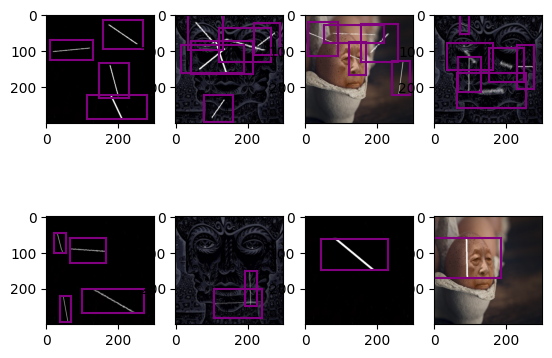

In [7]:
# proving my annotations work
import matplotlib.image as mpimg

with open(jsonPath) as j:
    trackData = json.loads(j.read())
for i in range(8):
    imgNum = np.random.randint(0,numImgs-1)
    bbox = []
    #print(rota[imgNum])
    for j in range(len(trackData["annotations"])):
        if trackData["annotations"][j]["image_id"] == imgNum:
            bbox.append(trackData["annotations"][j]['bbox'])
    #print(bbox)
    annot = trackData["annotations"][imgNum]['bbox']
    print("Image selected:",imgNum)
    plt.subplot(2,4,i+1)
    img = mpimg.imread(dataPath+"img{x}.png".format(x=imgNum))
    imgplot = plt.imshow(img)
    for j in bbox:
        #print(j)
        plt.plot(*bbox_to_rect(j), color='purple')   # had to use the greatest color
plt.show()